# **Metrics for evaluating the models quality and error analysis in ML**

One of the critical steps in creating a good model is to choose the right metric to assess its quality, since the wrong choice can lead to incorrect conclusions and, as a result, to making not the most optimal decisions. Therefore, today there is a large number of metrics suitable for a wide variety of tasks and situations.

In this article, popular metrics for classification, regression and clustering tasks will be considered, as well as a tool for analyzing model errors, known as bias-variance decomposition. In addition, manual calculations and implementation from scratch in Python will be presented for most of the metrics, and in the end you will be able to find additional sources for a deeper acquaintance.

## **Classification metrics**

For ease of understanding, consider the binary case. However, before doing this, you should carefully familiarize yourself with the error matrix (confusion matrix) and its components, shown in the image below.

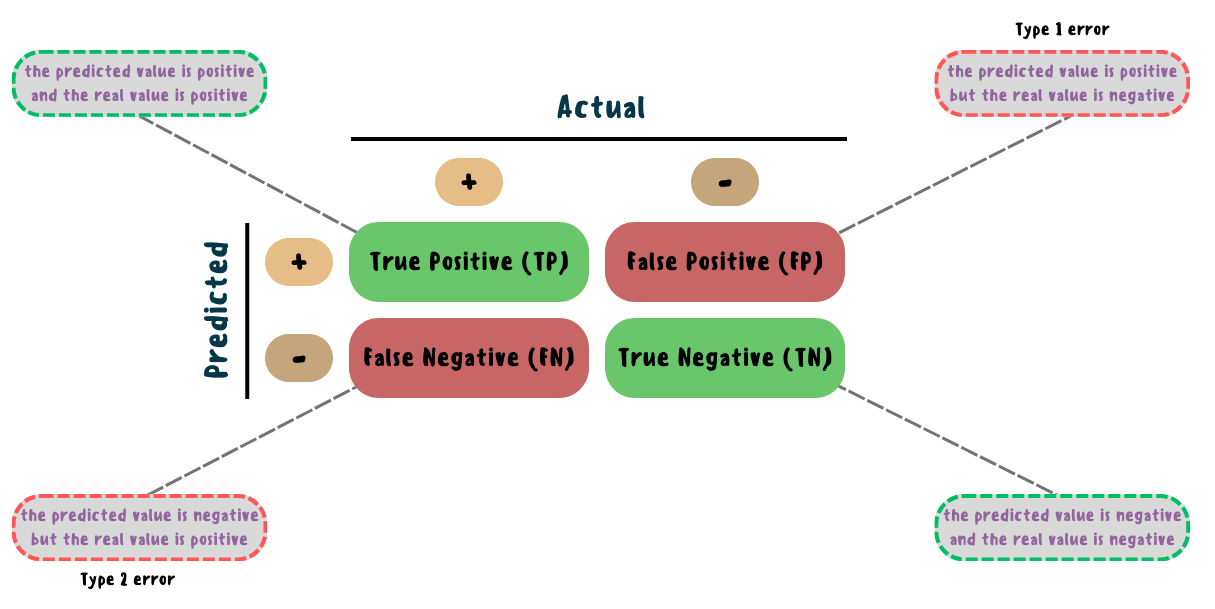

Correctly classified positive (TP) and negative (TN) classes are located on the main diagonal, and incorrectly classified ones are located on the side diagonal, which are also called errors of the first (FP) and second (FN) type. Now we are going to train logistic regression on the [Breast Cancer Wisconsin](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) dataset and build this matrix based on its predictions. However, before doing this, it is worth mentioning that in scikit-learn, the order of the components of the error matrix is slightly different from the image above, but this does not change the essence of what is happening:

$$| TN \ \ FP | \\ | FN  \ \ TP |$$  

**Import necessary libraries**

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             fbeta_score, roc_curve, roc_auc_score, precision_recall_curve,
                             auc, average_precision_score, classification_report)

**Uploading a dataset**

In [90]:
df_path = "/content/drive/MyDrive/breast_cancer.csv"
breast_cancer = pd.read_csv(df_path)
breast_cancer.drop(columns=['id','Unnamed: 32'], inplace=True)
print(breast_cancer)

X = breast_cancer.drop(columns='diagnosis', axis=1)
y = breast_cancer['diagnosis']
y = LabelEncoder().fit_transform(y)

# 1 - Malignant, 0 - Benign
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

**Training and forecasting of the logistic regression model**

In [91]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


**Building and visualizing the confusion matrix**

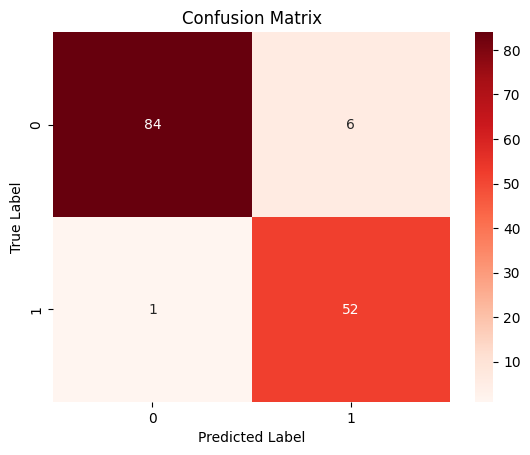

In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Looking at the resulting confusion matrix, we have the following:
- (True Positive) — 52 people are classified as sick and they are, that is, they are classified correctly;
- (True Negative) — 84 people are classified as healthy and they are, that is, they are also classified correctly;
- (False Positive) — 6 people are classified as sick (that is, they have a malignant tumor), but they are healthy (that is, the tumor is benign);
- (False Negative) — 1 person is defined as healthy, but he is sick (that is, has a malignant tumor).

Now we can move on to the metrics themselves.

### **Accuracy**

The easiest way to evaluate the quality of a model is **Accuracy**, which reflects the proportion of correctly predicted classes among all samples:

$$\text{Accuracy} = \frac{1}{N} \sum_{i=1}^{N} I [y_i = \hat y_i] = \frac{TP + TN}{TP + TN + FP + FN}$$

Now we are going to get the Accuracy value for our example:

$$\frac{52 + 84}{52 + 84 + 6 + 1} = 0.951048951048951$$

From here, you can also determine the proportion of erroneous classifications **Error rate**, which directly shows how often the model makes mistakes:

$$1 - \text{Accuracy} = 1 - 0.951048951048951 = 0.04895104895104896$$

In [93]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f'Accuracy: {accuracy}')
print(f'Error rate: {error_rate}')

Accuracy: 0.951048951048951
Error rate: 0.04895104895104896


Despite its simplicity and versatility, Accuracy has a number of serious drawbacks:
- does not take into account the imbalance of classes: if one class significantly prevails over another, then the model may be shifted in its direction, and then high accuracy will not reflect the true quality of the model;
- does not provide information about the type of model errors, for example, the number of false positive and false negative results, which does not allow taking into account the cost of the error for different classes;
- depends on the classification threshold, a change in which can significantly affect the accuracy value.

Next, we will consider the metrics in which these shortcomings are eliminated.

### **Precision**

Characterizes the proportion of correctly predicted positive classes among all samples that the model predicted as a positive class:

$$\text{Precision} = TPR = \frac{TP}{TP + FP} = \frac{52}{52 + 6} = 0.896551724137931$$

In [94]:
precision = precision_score(y_test, y_pred)
print(precision)

0.896551724137931


The less false positive predictions there are, the higher the Precision of the model. In this case, this metric is also important because it allows patients to avoid additional stress and unnecessary treatment in case of a false positive diagnosis.

### **Recall (TPR)**

Also known as the True Positive Rate, it reflects the proportion of correctly predicted positive classes among all real positive samples:

$$\text{Recall} = \frac{TP}{TP + FN} = \frac{52}{52 + 1} = 0.9811320754716981$$

In [95]:
recall = recall_score(y_test, y_pred)
print(recall)

0.9811320754716981


The fewer false negative predictions there are, the higher the Recall or TPR. In the context of breast cancer, these metrics are even more important than the previous one, since they show how many malignant tumors were actually detected.

### **FPR**

The False Positive Rate characterizes the proportion of erroneously predicted positive classes among all samples that are actually a negative class. In other words, it shows how often the model incorrectly predicts the presence of a disease (in the case of breast cancer) when it actually does not exist (benign samples mistakenly identified as cancerous from all real benign cases).

For a better understanding of the metrics just described, it is worth reviewing the image below.

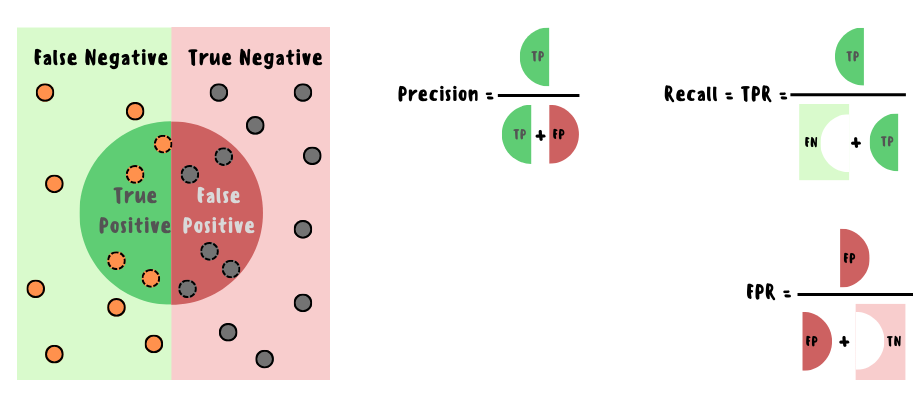

### **F1-score**

It represents a harmonic mean between Precision and Recall, providing a balance between them, which is especially useful in a case of uneven class distribution. Using this metric allows you to better choose a model that not only accurately classifies malignant cases, but also minimizes the number of missed malignant tumors.

$$\text{F1-score} = 2 \cdot \frac{precision \cdot recall}{precision + recall} \approx 2 \frac{0.8966 \cdot 0.9811}{0.8966 + 0.9811} \approx 0.936948671246738$$

In [96]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.9369369369369369


It is worth adding that F1-score proceeds from the assumption that Precision and Recall are of equal importance. If it is necessary to give more importance (weight) to one of the metrics, then you can use **$F_{\beta}$ - score**:

$$\text{F}_{\beta}= (1 + \beta^2) \cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall}$$

For $\beta > 1$, Recall is given greater importance, and for $\beta < 1$, Precision is given. In other words, if we want to focus more on really detected tumors, then we increase the $\beta$, if we want to avoid false positive predictions (that is, when a person does not have cancer, but the model predicts that there is), then we decrease the $\beta$. For example, with $\beta = 2$ we get the following:

$$F_2 \approx (1 + 2^2) \cdot \frac{0.8966 \cdot 0.9811}{2^2 \cdot 0.8966 + 0.9811} \approx 0.9629493814997262$$

In [97]:
f2 = fbeta_score(y_test, y_pred, beta=2)
print(f2)

0.9629629629629629


### **ROC-AUC**

All previous metrics allow you to evaluate the quality of the model only at a certain classification threshold. In the case when it is necessary to evaluate the quality of the model at different thresholds, the AUC area (Area Under Curve) under the ROC curve (Receiver Operating Characteristics curve) is used, expressed in terms of the ratio of the proportion of true positive predictions (TPR) to the proportion of false positive (FPR).

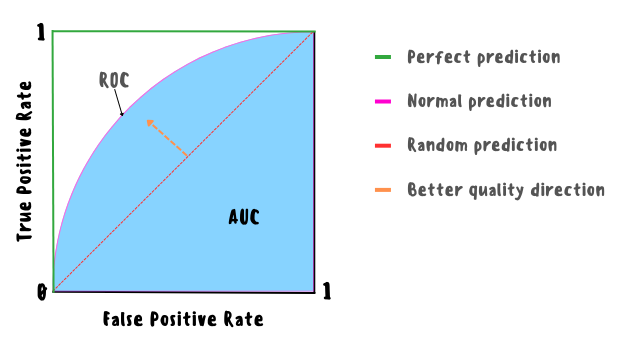

Ideally, the ROC curve will tend to the upper-left corner (TPR=1 and FPR=0), and the area under it (AUC) will be equal to one. With an area value of 0.5, the quality of the model's predictions will be comparable to random guessing, but if this value is less than 0.5, then the model better predicts the results opposite to the true ones — in this case, you just need to swap the target labels to get an area greater than 0.5.

For a better understanding, let's build this metric from scratch. In general, the process consists of the following steps:

- 1) first, the probabilities predicted by the model to be a positive class are sorted in descending order and taken as thresholds;
- 2) for each threshold, the labels are classified (binarized) into 1 and 0, and FPR and TPR are calculated based on them;
- 3) The obtained FPR and TPR are used to calculate AUC using the trapezoid method, which looks like this:

$$AUC = \sum_{i=1}^{n-1} \frac{TPR_i + TPR_{i+1}}{2} (FPR_{i+1} - FPR_i)$$

However, a such process is inefficient, since all thresholds are used in the construction of the ROC curve, most of which are suboptimal. What does this mean? When plotting a plot, a straight line is drawn between two points and if there is another point between them located at the same level, then it will not be displayed on the constructed ROC curve. It is precisely this kind of point that is called suboptimal. Therefore, to build a ROC curve and calculate the area under it, it is enough to know only the corner points, which, among other things, will allow you to build lighter ROC curves. To find the optimal values, follow these steps:

- 1) for each threshold sorted in descending order, the binarization of labels is performed, on the basis of which FP and TP are calculated;
- 2) for the obtained FP and TP, the second difference between neighboring values is calculated, which acts as the second derivative;
- 3) in places where the second derivative is not zero, corner points will be located;
- 4) the positions in the list of corner points are used to find the optimal thresholds, FP and TP;
- 5) zeros are added to the list of optimal FP and TP at the beginning so that the ROC curve always starts at (0, 0); and the maximum value y_score + 1 is added to the list of optimal thresholds at the beginning so that the ROC curve ends in one even if all samples are incorrectly classified;
 6) based on the obtained optimal values of FP and TP, optimal FPR and TPR are calculated, which are further used to calculate AUC using the trapezoid method.

**Implementation from scratch**

AUC: 0.9951781970649896

Optimal False Positive Rates:
[0.         0.         0.         0.01111111 0.01111111 0.04444444
 0.04444444 0.12222222 0.12222222 1.        ]

Optimal True Positive Rates:
[0.         0.01886792 0.86792453 0.86792453 0.94339623 0.94339623
 0.98113208 0.98113208 1.         1.        ]

Optimal thresholds:
[2.00000000e+00 1.00000000e+00 9.39251068e-01 9.28758892e-01
 8.62519599e-01 7.34708679e-01 6.73824037e-01 2.39038287e-01
 2.23663185e-01 1.80054591e-06]


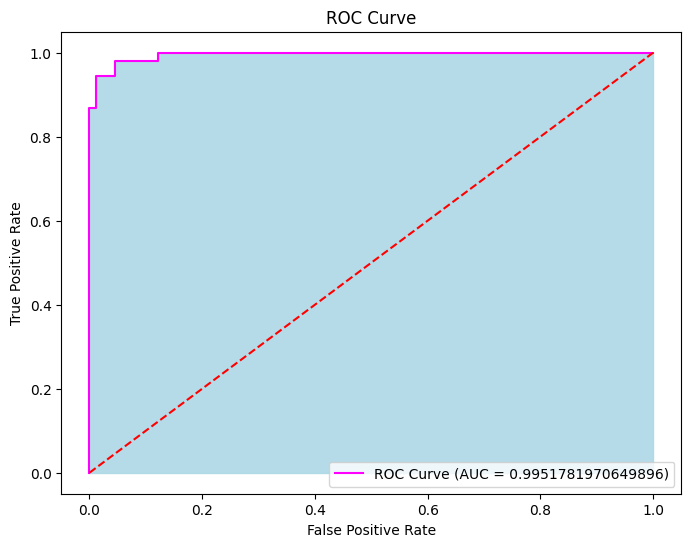

In [98]:
def binary_roc_curve(y_true, y_score):
    thresholds = np.sort(y_score)[::-1]
    tps = np.array([])   # True positives
    fps = np.array([])   # False positives

    for threshold in thresholds:
        # predictions binarization by each threshold
        y_pred = (y_score >= threshold).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tps = np.append(tps, tp)
        fps = np.append(fps, fp)

    # find optimal (corner) points (thresholds)
    corner_point = True
    d2_fps = np.diff(fps, 2)   # is used as a "second derivative"
    d2_tps = np.diff(tps, 2)
    is_corner_points = np.r_[corner_point, np.logical_or(d2_fps, d2_tps), corner_point]
    optimal_indexes = np.where(is_corner_points == corner_point)[0]

    # add an extra threshold position to optimal values to make sure that the curve starts
    # at (0, 0) and also ends in 1 even if all samples are incorrectly classified
    optimal_fps = np.r_[0, fps[optimal_indexes]]
    optimal_tps = np.r_[0, tps[optimal_indexes]]
    optimal_thresholds = np.r_[max(y_score) + 1, thresholds[optimal_indexes]]

    optimal_fpr = optimal_fps / optimal_fps[-1]
    optimal_tpr = optimal_tps / optimal_tps[-1]

    return optimal_fpr, optimal_tpr, optimal_thresholds


def area_by_trapz(y, x):
    dx = np.diff(x)   # height

    return 0.5 * ((y[1:] + y[:-1]) * dx).sum()


def binary_roc_auc_score(y_test, y_pred):
    fpr, tpr, _ = binary_roc_curve(y_test, y_pred)

    return area_by_trapz(tpr, fpr)


y_pred_probas = model.predict_proba(X_test)[:, 1]
roc_auc = binary_roc_auc_score(y_test, y_pred_probas)
fpr, tpr, thresholds = binary_roc_curve(y_test, y_pred_probas)

print(f'AUC: {roc_auc}', '', sep='\n')
print('Optimal False Positive Rates:', fpr, '', sep='\n')
print('Optimal True Positive Rates:', tpr, '', sep='\n')
print('Optimal thresholds:', thresholds, sep='\n')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc})', color='fuchsia')
plt.plot([0, 1], [0, 1], 'r--')  # Dashed diagonal line
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.9)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Scikit-learn implementation**

In [99]:
sk_roc_auc = roc_auc_score(y_test, y_pred_probas)
sk_fpr, sk_tpr, sk_thresholds = roc_curve(y_test, y_pred_probas)

print(f'AUC (scikit-learn): {sk_roc_auc}', '', sep='\n')
print('Optimal False Positive Rates (scikit-learn):', sk_fpr, '', sep='\n')
print('Optimal True Positive Rates (scikit-learn):', sk_tpr, '', sep='\n')
print('Optimal thresholds (scikit-learn):', sk_thresholds, sep='\n')

AUC (scikit-learn): 0.9951781970649896

Optimal False Positive Rates (scikit-learn):
[0.         0.         0.         0.01111111 0.01111111 0.04444444
 0.04444444 0.12222222 0.12222222 1.        ]

Optimal True Positive Rates (scikit-learn):
[0.         0.01886792 0.86792453 0.86792453 0.94339623 0.94339623
 0.98113208 0.98113208 1.         1.        ]

Optimal thresholds (scikit-learn):
[2.00000000e+00 1.00000000e+00 9.39251068e-01 9.28758892e-01
 8.62519599e-01 7.34708679e-01 6.73824037e-01 2.39038287e-01
 2.23663185e-01 1.80054591e-06]


It makes sense to use ROC-AUC in tasks where it is not so much the predicted classes that are important as their correct probabilistic order. For example, we have an online cinema and we want to find out which users will renew their monthly subscription. At first glance, it may seem that this is a common binary classification and you just need to predict labels, but a more useful option would be to arrange customers by the probability of cancellation of subscriptions in order to use various strategies to retain them in the future.

This may give the impression that ROC-AUC is a good metric for ranking tasks, but not everything is as simple as it might seem at first glance. The fact is that ROC-AUC does not cope very well with a strong class imbalance, since it takes into account the truly negative cases (TN), which follows from the FPR calculations. Simply put, the model can show a high TPR, but also have a large number of false positive predictions (FPR).

### **PR-AUC и Average Precision (AP)**

In this case, you can use the area in the Precision Recall axes, known as **PR-AUC**, which is better suited for data with a strong class imbalance. This is due to the fact that PR-AUC focuses on the ratio of true positive and false negative results, which better reflects the model's ability to correctly identify positive classes and, therefore, better cope with ranking tasks where it is needed in the first place. For example, if we want to show the most relevant movies to the user, PR-AUC will better take into account the movies that are really interesting to the user (TP), while ROC-AUC can take into account the least interesting movies (TN). It is also worth adding that, unlike ROC-AUC, on the graph, PR-AUC will tend to the upper-right corner, and its finding is performed as follows:

In [100]:
precisions, recalls, _ = precision_recall_curve(y_test, y_pred_probas)
pr_auc_score = auc(recalls, precisions)
print(pr_auc_score)

0.9924452566260418


However, everything is not so simple here either, since the calculation of PR-AUC is also based on the trapezoid method, which, in turn, uses linear interpolation. What could be wrong with that? If interpolation between two points in ROC space can be performed simply by connecting them with a straight line, then in PR space interpolation can have a more complex connection. When the Recall level changes, the Precision metric will not necessarily change linearly, since FP replaces FN in the Precision denominator. In this case, linear interpolation is erroneous and may give an overly optimistic assessment of the quality of the model. Simply put, in the case of PR-AUC, this approach may consider an overestimated area under the curve.

Therefore, in scikit-learn there is an alternative (and very similar) metric called **Average Precision**. Its main difference lies precisely in the fact that linear interpolation is not used for calculation. Instead, the Precision-Recall curve is summed as the weighted average of the Precisions obtained for each threshold, and the weight is an increase in Recall compared to the previous threshold:

$$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$$

In [101]:
ap_score = average_precision_score(y_test, y_pred_probas)
print(ap_score)

0.992511694643552


### **When there are more than two classes**

Usually, the task of classifying into $K$ classes is to separate the $k$ class from all the others, followed by calculating the consufion matrix for each of them. In this case, averaged methods can be used to obtain the final value of the metric:

- 1) **Micro-averaging** is the equivalent of accuracy and is suitable for balanced classes. The elements of the confusion matrix are averaged between binary predictions for each class, after which the metrics are calculated on the resulting matrix. Using the example of Precision and Recall, it looks like this:

$$\text{Precision}_{\text{(micro)}} = \frac{\sum_{k=1}^{K} \text{TP}_k}{\sum_{k=1}^{K} (\text{TP}_k + \text{FP}_k)}$$

$$\text{Recall}_{\text{(micro)}} = \frac{\sum_{k=1}^{K} \text{TP}_k}{\sum_{k=1}^{K} (\text{TP}_k + \text{FN}_k)}$$

- 2) **Macro-averaging** is the arithmetic mean of the calculated metric for each class and is used for class imbalance when each class is important. In this case, all classes are counted evenly regardless of their size:

$$\text{Precision}_{\text{(macro)}} = \frac{1}{K} \sum_{k=1}^{K} \frac{\text{TP}_k}{\text{TP}_k + \text{FP}_k}$$

$$\text{Recall}_{\text{(macro)}} = \frac{1}{K} \sum_{k=1}^{K} \frac{\text{TP}_k}{\text{TP}_k + \text{FN}_k}$$

- 3) **Weighted averaging** is calculated as a weighted average and is also applied in case of class imbalance, but only when the importance of a class is taken into account depending on the number of objects with a such class, that is, when the largest classes are important. With this approach, the importance of each class is taken into account with the assignment of weights to them. The weight of the class **w_k** can be set in different ways, for example, as the proportion of examples of this class in the training sample:

$$\text{Precision}_{\text{(weighted)}} = \sum_{k=1}^{K} w_k \cdot \frac{\text{TP}_k}{\text{TP}_k + \text{FP}_k}$$

$$\text{Recall}_{\text{(weighted)}} = \sum_{i=1}^{K} w_k \cdot \frac{\text{TP}_k}{\text{TP}_k + \text{FN}_k}$$

For a better understanding, let's look at an example with the calculation of the most popular metrics based on the [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data) dataset. To do this, use the classification_report function from scikit-learn.

**Uploading a dataset**

In [102]:
red_wine = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
print(red_wine)

X = red_wine.drop(columns='quality', axis=1)
y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**Model training and evaluation of the obtained results**

The first thing you can notice is that, in general, the classifier did not cope very well. The next interesting observation is that due to the strong imbalance of classes, not all classes were predicted, so the metrics for some classes are marked with zeros.

In this case, the micro-averaging (accuracy) showed overestimated results, but the macro shows a more realistic picture, provided that all predicted classes are equally important for us. Weighted averaging, in turn, showed the model's ability to identify the most common classes, which also turned out to be not very good.

In [103]:
ovr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_model.fit(X_train, y_train)
y_pred = ovr_model.predict(X_test)

clf_report = classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.65      0.78      0.71       169
           6       0.59      0.63      0.61       170
           7       0.50      0.20      0.29        40
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.29      0.27      0.27       400
weighted avg       0.58      0.62      0.59       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Regression metrics**

In this case, the target label is a real number, because it is related to the nature of regression tasks, for example, weather forecast, stock price, real estate price, and so on. Therefore, most metrics in regression tasks represent an average estimate of the difference between actual and predicted values, however, with some peculiarities. Let's look at them in more detail by training linear regression on [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance/data) dataset.

**Import necessary libraries**

In [104]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error,
                             mean_squared_error, mean_squared_log_error, r2_score)

**Uploading a dataset**

In [105]:
df_path = "/content/drive/MyDrive/insurance.csv"
insurance_cost = pd.read_csv(df_path)
print(insurance_cost)

X = insurance_cost.drop(columns='charges', axis=1)
y = insurance_cost['charges']

cat_features_list = X.select_dtypes(include=['object']).columns
X[cat_features_list] = X[cat_features_list].apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


**Training linear regression**

In [106]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[10947.91401491  9764.82733066 38027.18625354 16076.26656375
  7003.05093861  4162.38974052  1745.17453352 14273.5330135
  9022.7490154   7548.70107263  4742.33662827 10290.75344147
  8592.56051588  4173.37165612 27970.0324915  11026.04778351
 11286.00941429  6197.06911697  8269.51468144 27263.01056172
 33686.9512703  14247.8812616  11735.79293452 32419.5578177
  4475.57228648  9264.65728706  1336.5408973  10083.42064465
  4134.01766875 10422.0367284   9033.04363126 40177.36502272
 15327.89185262 13541.84076855 24979.41529438  5273.0794857
 12809.44891047 30538.99654744 33503.98483751  3477.84775709
  4169.03343497  4346.93367013 30642.90398321 39366.95813634
 28066.36347631  5110.98142166 10919.49675465  7870.63024919
  3790.77872548 10529.86942143  5758.50260778  3526.36470247
 32837.53966438 38431.60954739 16119.53210068  7198.88399648
  6010.47765564  9455.45703492  9323.82247057 11736.15685931
  1745.70435635 38856.13381995 15133.33969997 11575.03834933
 14071.5724629  13696.52725

### **MAE**

**Mean Absolute Error** shows how much, on average, the model's predictions deviate from the real values modulo:

$$\text{MAE}(y, \hat y) = \frac{1}{N} \sum_{i=1}^N |y_i - \hat y_i|$$

This metric is easy to interpret and resistant to outliers, but it does not take into account the scale (how large the deviation is) and the direction of errors (positive or negative deviation from real values).

In [107]:
def mae_score(y_true, y_pred):
    n = len(y_true)

    return 1 / n * np.sum(np.abs(y_true - y_pred))


mae = mae_score(y_test, y_pred)
sk_mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')
print(f'mae(scikit-learn): {sk_mae}')

mae: 3998.2715408869726
mae(scikit-learn): 3998.2715408869726


As you can see, the resulting error cannot show us directly how much the model is wrong. In other words, depending on the context, exactly the same MAE value can be both a good and a bad result. Imagine the following situation: we need to predict how much the store chain will sell bananas for. To do this, we will model the new data based on the previous ones, adding the value 10000 to them.

In [108]:
true_sales = y_test + 10_000
pred_sales = y_pred + 10_000

mae_for_sales = mean_absolute_error(true_sales, pred_sales)
print(f'mae(for sales): {mae_for_sales}')

mae(for sales): 3998.2715408869726


It is not difficult to guess that despite the same MAE, in one case the quality of the model will be better than in the other. In such a situation, it is convenient to consider not an absolute, but a relative error on objects.

### **MAPE & SMAPE**

**Mean Absolute Percentage Error** just allows you to estimate as a percentage how much the model's predictions differ relative to real values:

$$\text{MAPE}(y, \hat y) = \frac{1}{N} \sum_{i=1}^N \frac{|y_i - \hat y_i|}{|y_i|}$$

In [109]:
def mape_score(y_true, y_pred):
    n = len(y_true)
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true)

    return  1 / n * np.sum(numerator / denominator)


mape = mape_score(y_test, y_pred)
sk_mape = mean_absolute_percentage_error(y_test, y_pred)
mape_for_sales = mean_absolute_percentage_error(true_sales, pred_sales)

print(f'mape: {mape}')
print(f'mape(scikit-learn): {sk_mape}')
print(f'mape(for sales): {mape_for_sales}')

mape: 0.4138713715103651
mape(scikit-learn): 0.4138713715103651
mape(for sales): 0.15963240527305983


Now it is clearly visible that the model is much more mistaken in the first case, even despite the same MAE values. However, MAPE is not suitable for cases where at least one actual value is zero, as can be seen from the formula. In this case, you can use a symmetric MAPE, known as **Symmetric Mean Absolute Percentage Error**:

$$\text{SMAPE}(y, \hat y) = \frac{1}{N} \sum_{i=1}^N \frac{2 |y_i - \hat y_i|}{y_i + \hat y_i}$$


In [110]:
def smape_score(y_true, y_pred):
    n = len(y_true)
    numerator = 2 * np.abs(y_true - y_pred)
    denominator = (y_true + y_pred)

    return  1 / n * np.sum(numerator / denominator)


smape = smape_score(y_test, y_pred)
print(f'smape: {smape}')

smape: 0.3573799807309885


### **WAPE**

Like other metrics, MAPE is also not applicable in all conditions. For example, it does a poor job of analyzing time series with seasonal fluctuations, because it does not take into account the relative importance of observations and does not work well with uneven data. For such a case, **Weighted Average Percentage Error** is better suited, which normalizes the total error to the total sum of the actual values:

$$\text{WAPE}(y, \hat y) = \frac{\sum_{i=1}^N |y_i - \hat y_i|}{\sum_{i=1}^N |y_i|}$$

For example, ice cream sales have a pronounced seasonality, while sales in the summer months are significantly higher than in the winter months. In this case, WAPE will show a more realistic estimate, since it will take into account the prediction error for each month relative to the total sales volume, which will eventually make it possible to better cope with intermittent sales.

In [111]:
def wape_score(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true))

    return numerator / denominator


wape = wape_score(y_test, y_pred)
print(f'wape: {wape}')

wape: 0.29762832405759587


### **MSE & RMSE**

**Mean Squared Error** shows how much, on average, the model's predictions deviate from the real values squared:

$$\text{MSE}(y, \hat y) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2$$

This metric is useful in cases where you need to focus on big mistakes and choose a model that allows them the least on average. On the other hand, due to the square of the difference in the formula above, MSE is sensitive to outliers and more difficult to perceive compared to MAE.

In [112]:
def mse_score(y_true, y_pred):
    n = len(y_true)

    return 1 / n * np.sum((y_true - y_pred) ** 2)


mse = mse_score(y_test, y_pred)
sk_mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')
print(f'mse(scikit-learn): {sk_mse}')

mse: 32073628.560109198
mse(scikit-learn): 32073628.560109198


Therefore, in order to give the MSE value the dimension of the original data, the square root is extracted from it. This metric is called **Root Mean Squared Error** and its main advantage is better interpretability compared to MSE:

$$\text{RMSE}(y, \hat y) = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2}$$

In [113]:
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

rmse: 5663.358417062193


### **MSLE & RMSLE**

Another way to get to relative errors is to measure them on a logarithmic scale, as is done in **Mean Squared Logarithmic Error**:

$$\text{MSLE}(y, \hat y |c) = \frac{1}{N} \sum_{i=1}^N (\text{ln}(y_i + c) - \text{ln}(\hat y_i + c))^2$$

where $c$ is a normalized constant (usually equal to 1), which is introduced to avoid the logarithm of zero.

This metric is more resistant to outliers because it makes the distribution of target and predicted values more uniform. On the other hand, MSLE is more difficult to interpret, and it is also worth bearing in mind that it pays more attention to underestimated forecasts, since the logarithm is an asymmetric function.

In [114]:
def msle_score(y_true, y_pred, c=1):
    n = len(y_true)

    return 1 / n * np.sum((np.log(y_true + c) - np.log(y_pred + c)) ** 2)


msle = msle_score(y_test, y_pred)
sk_msle = mean_squared_log_error(y_test, y_pred)
print(f'msle: {msle}')
print(f'msle(scikit-learn): {sk_msle}')

msle: 0.2966547825040618
msle(scikit-learn): 0.2966547825040618


Accordingly, to estimate the MSLE value relative to the dimension of the source data, **Root Mean Squared Logarithmic Error is used**:

$$\text{RMSLE}(y, \hat y |c) = \sqrt{\frac{1}{N} \sum_{i=1}^N (\text{ln}(y_i + c) - \text{ln}(\hat y_i + c))^2}$$

In [115]:
rmsle = np.sqrt(msle)
print(f'rmsle {rmsle}')

rmsle 0.5446602450189125


### **R2 & Adjusted R2**

Sometimes it is difficult to understand how good or bad the value of the calculated error is, so it would be convenient to have in some sense an analogue of percentage accuracy, but only for the regression task. Fortunately, a such metric exists and it is the coefficient of determination $\text{R}^2$, which shows what proportion of the variance of the target values is explained by the model:

$\text{R}^2 = \frac{SST - SSR}{SST} = 1 - \frac{SSR}{SST} = 1 - \frac{\sum_{i=1}^N(y_i - \hat y_i)^2}{\sum_{i=1}^N(y_i - \overline y)^2}$

where $SSR$ — Sum of Squared Residuals, and $SST$ — Sum of Squares Total.

Unlike the previous metrics, in this case, a higher metric value indicates a better model quality. The values of $\text{R}^2$ can be interpreted as follows:

- 1) $\text{R}^2 =1$ — the model predicts the data perfectly;
- 2) $\text{R}^2 =0$ — the model predictions correspond to the arithmetic mean of the actual target values;
- 3) $\text{R}^2 < 0$ — the model performs worse than simply using the average of the actual target values (this is usually due to the fact that the model was trained on data that had large outliers).

In [116]:
def manual_r2_score(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)

    return 1 - ssr / sst


r2 = manual_r2_score(y_test, y_pred)
sk_r2 = r2_score(y_test, y_pred)
print(f'r2: {r2}')
print(f'r2(scikit-learn): {sk_r2}')

r2: 0.7962732059725786
r2(scikit-learn): 0.7962732059725786


It is worth noting that $\text{R}^2$ also has its limitations. Its main problem is that it does not take into account the number of features in the model. In other words, $\text{R}^2$ tends to increase when new features are added to the training set, even if they do not improve the quality of the model.

In this case, comparing models with different numbers of features becomes incorrect, so the **Adjusted$\text{R}^2$** is used specifically for this purpose, which uses the introduction of a penalty for added features:

$$\text{R}_{adj}^2 = 1 - \frac{SSR \cdot (n-1)}{SST \cdot (n - k - 1)} = 1 - \frac{(1 - R^2) (n - 1)}{n - k - 1}$$

where $n$ is the number of observations and $k$ is the number of features.

In [117]:
def adjusted_r2_score(y_true, y_pred, x_shape):
    n, k = x_shape
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - ssr / sst

    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


r2_adj = adjusted_r2_score(y_test, y_pred, X.shape)
print(f'r2 adjusted: {r2_adj}')

r2 adjusted: 0.7953548282384204


## **Bias-Variance Decomposition**

Without straying far from the topic of regression, let's consider the decomposition of the model error into bias, variance and random noise in the data. This is a useful tool that allows you to assess the impact of the above-described components of a common test error and select the most optimal model in terms of its complexity.

### **Error decomposition derivation for MSE**

For simplicity, let's consider a regression problem with a root-mean-square loss function. Suppose that the target value of $y$ can be expressed using some deterministic function $f$ as follows:

$$y = f(x) + \varepsilon$$

where $\varepsilon$ is random noise, with $E [\varepsilon] = 0, \ E [\varepsilon^2] = \sigma^2$.

Then the MSE for the model prediction $\hat f(x)$ will look like this:

$$MSE = E[(y - \hat f(x))^2] = E[y^2] - 2E[y \hat f(x)] + E[\hat f(x)^2]$$

where is the bias and variance for $\hat f(x)$ are equal respectively:

$$Bias[\hat f(x)] = f(x) - E[\hat f(x)]$$
$$Var[\hat f(x)] = E[\hat f(x)^2] - E[\hat f(x)]^2$$

Now you can write each component individually:

$$\begin{align*}
E[y^2] & = E[f(x)^2] + E[\varepsilon^2] + 2E[f(x) \varepsilon] \\
&= E[f(x)^2] + \sigma^2 + 2f(x) \underbrace{E[\varepsilon]}_{=0} \\
&= f(x)^2 + \sigma^2
\end{align*}$$

$$$$

$$\begin{align*}
E[y \hat f(x)] &= E[(f(x) + \varepsilon) \hat f(x)]\\
&= E[(f(x) \hat f(x)] + E[(\varepsilon \hat f(x)] \\
&= f(x) E[\hat f(x)] + \underbrace{E[\varepsilon]}_{=0} E[\hat f(x)] \\
&= f(x) E[\hat f(x)]
\end{align*}$$

$$$$

$$E[\hat f(x)^2] = Var[\hat f(x)] + E[\hat f(x)]^2$$

Thus, the MSE decomposition into components takes the form:

$$\begin{align*}
MSE &= f(x)^2 + \sigma^2 - 2 f(x) E[\hat f(x)] + Var[\hat f(x)] + E[\hat f(x)]^2 \\
&= (\underbrace{f(x) - E[\hat f(x)]}_{=Bias})^2 + Var[\hat f(x)] + \sigma^2 \\
&= Bias[\hat f(x)]^2 + Var[\hat f(x)] + \sigma^2
\end{align*}$$

The resulting equation shows and proves that the general error of the model prediction consists of the square of the bias (how much the model is wrong on average), the variance (how the model predictions differ with different data) and an irreversible error due to noise in the data. Usually, high values of bias and variance correspond to underfitting and overfitting of the model, respectively, so ideally we would like to aim these values to zero. Unfortunately, this is practically impossible in practice, so the task boils down to finding the optimal balance between bias and variance. The image below shows possible cases of their combination.

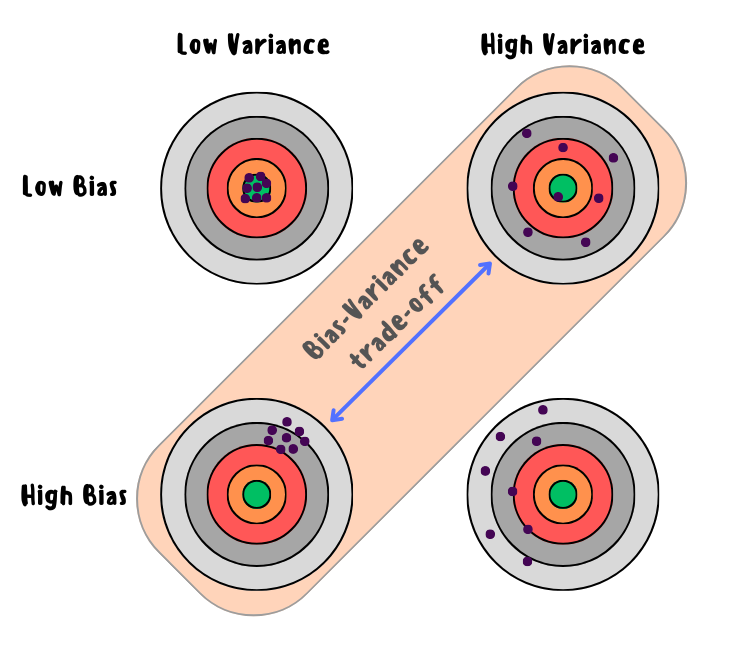

### **Bias-Variance trade-off**

As a result, there are two options left:
- 1) creating a simple model so that it is stable and less sensitive (low variance), but at the same time it may not capture all the patterns in the data (high bias);
- 2) creating a complex model so that it can capture more subtle patterns (low bias), however, in this case, sensitivity to noise and individual points in the data increases (high variance).

Such a phenomenon as the search for a compromise between bias and variance is called in the literature **bias-variance trade-off**, which implies that the total error in the test sample has the form of a U-shaped curve.

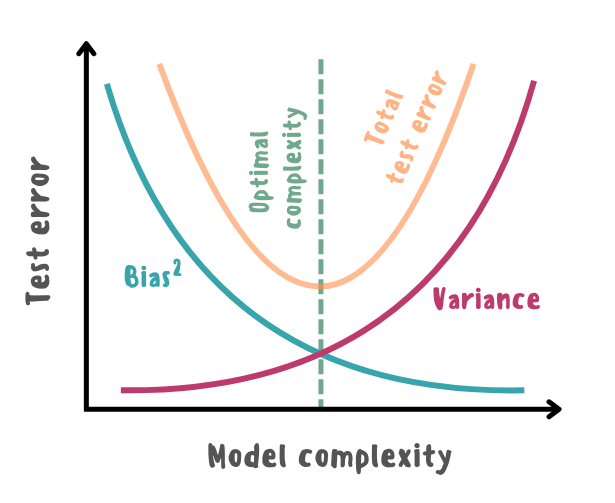

This plot illustrates that there is an optimal complexity of the model, in which the error is minimal and at the same time a balance is also maintained between **overfitting** (high accuracy on training data and low on test data) and **underfitting** (the inability of the model to capture patterns in training data, which leads to low accuracy on it, and on test one). Below is an example for linear regression.

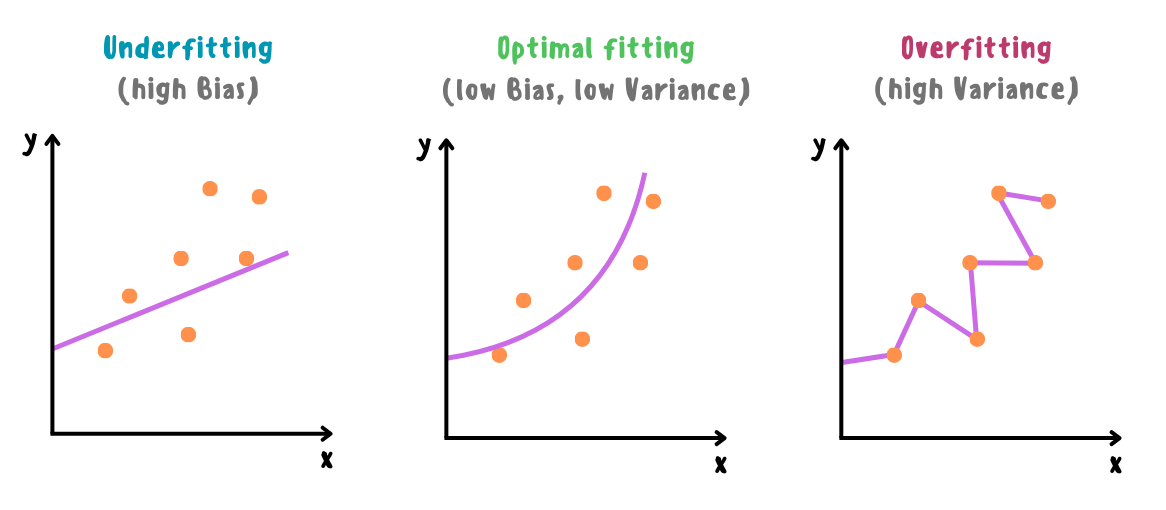

### **Interesting features of bias-variance**

Two important points should be noted:

- 1) The resulting error decomposition is true only for the quadratic loss function. For example, this decomposition cannot be applied directly to a standard classification problem, because in this context, a loss function of the form 0/1 is usually used, for which the bias and variance are no longer additive in their pure form. Therefore, more general forms of this decomposition are used with components that are similar in some sense. So for the 0/1 loss function, the bias can be defined as 1 if the prediction does not match the true y mark, and 0 otherwise. The variance, in turn, can be represented as the probability that the predicted label does not match the mode prediction. In other words, bias-variance decomposition can still be applied to a large number of different loss functions and algorithms, although not in such a simple form. This can be found in more detail in the works of Domingos (2000) and Valentini & Dieterich (2004).
-2) Bias-variance trade-off is performed when the error is decomposed in far from every case. For example, the deep neural network (DNN) test error often shows a double decrease: as the complexity of the model increases, it first follows the classical U-shaped curve, and then shows a second decrease. Moreover, a similar phenomenon is typical for ensembles over decision trees, which manifests itself with a simultaneous increase in depth and number of trees. Simply put, as the complexity of the model increases, both the bias and the variance may decrease. This is usually caused by two factors:
 - Bias-variance decomposition, in its classical view, is not detailed enough to identify all the main stochastic factors that explain the error behavior in complex models.
 - Gradual expansion of the DNN, which often leads to a bell-shaped variance of errors. Moreover, a new phenomenon known as **double epoch descent** (Nakkiran et al., 2019) has recently been discovered, which occurs when the number of training epochs increases instead of increasing the complexity of the model. Heckel & Yilmaz (2020) showed that double epoch transition occurs in a situation where different parts of the DNN are trained at different epochs, which can be eliminated by properly scaling the step sizes.

 Usually, the solution to such a problem is to use more advanced error decomposition methods, which include more informative variance decomposition, for example, symmetric decomposition and optimization variance (OV). Since this is still not an article about neural networks, we will omit the implementation of these concepts from scratch.

## **Clustering metrics**

Unlike classification, assessing the quality of clustering is a more difficult task, since it refers to methods of unsupervised learning. There are several reasons for this:

- instead of the exact match of the true labels with the predicted ones, it is more important for us to group similar objects within the same cluster;
- also, we often do not know the true labels, which makes it impossible to compare them directly with the results obtained.

Clustering metrics are divided into two types:
- 1) **External** — based on the use of previously known information (for example, true labels), which was not involved in the clustering process. These include: Adjusted Rand Index (ARI), Mutual Information, Homogeneity, Completeness, V-measure, Fowlkes-Mallows score.

- 2) **Internal** — use information only from the structure of the training set. Among them are the following: Silhouette Coefficient, Calinski-Harabasz Index, Davies-Bouldin Index. This option is useful when there is no information about the true labels (which is quite common).

Let's take a look closer at each of these metrics on the generated make blobs data.

**Import necessary libraries**

In [118]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import (rand_score, adjusted_rand_score, mutual_info_score,
                             normalized_mutual_info_score, adjusted_mutual_info_score,
                             homogeneity_score, completeness_score, v_measure_score,
                             homogeneity_completeness_v_measure, fowlkes_mallows_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)

**Uploading a dataset**

In [119]:
X, y = make_blobs(n_samples=75, n_features=2, centers=5, random_state=0)
print(y)

[0 3 4 3 2 4 0 2 0 4 2 4 2 2 0 0 0 3 2 0 2 2 2 3 4 1 1 2 3 0 4 4 3 3 3 2 2
 0 1 1 3 1 0 2 4 1 4 4 0 4 1 0 3 0 4 1 2 1 4 3 1 1 3 0 3 4 1 2 1 4 0 3 1 1
 3]


**Training Affinity Propagation**

In [120]:
ap = AffinityPropagation()
y_pred = ap.fit_predict(X)
print(y_pred)

[2 0 1 2 3 1 2 3 2 1 3 1 3 4 2 2 2 0 3 2 3 3 2 0 1 4 4 3 0 3 1 1 0 0 0 3 3
 2 4 4 0 4 2 3 1 4 1 1 4 1 4 2 0 2 1 4 3 4 1 0 4 4 0 2 0 1 4 3 3 1 2 0 4 4
 0]


**Visualization of the obtained clustering**

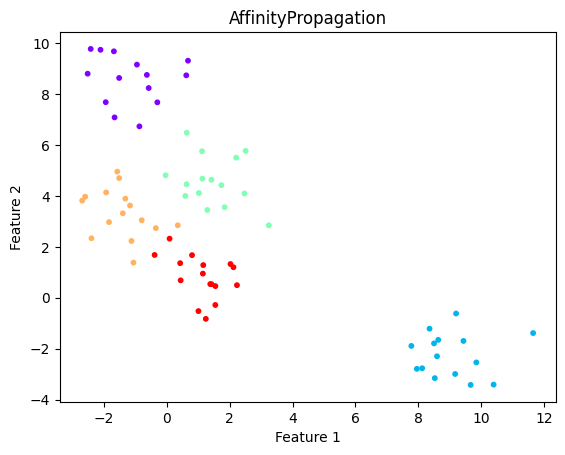

In [121]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow', s=10)
plt.title('AffinityPropagation')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### **Rand Index & Adjusted Rand Index (ARI)**

They are one of the simplest metrics. **Rand Index** measures the number of pairs of elements assigned to the same and different clusters relative to the total number of possible pairs in the data, ignoring permutations:

$$\text{RI} = \frac{a + b}{C_2^{n_{samples}}}$$

This metric is well interpreted because its values are in the range [0, 1], where 1 corresponds to ideal clustering. On the other hand, Rand Index does not guarantee that random label assignments will get values close to zero (especially if the number of clusters has the same value order as the number of samples). This is one of the reasons why Rand Index often gives an overly optimistic assessment.

In [122]:
ri = rand_score(y, y_pred)
print(f'rand index: {ri}')

rand index: 0.9405405405405406


By normalizing this index, you can reduce the expected $E[\text{RI}]$ and thus get rid of the negative effect above. Then we get an adjusted estimate, known as the **Adjusted Rand Index (ARI)**:

$$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}$$

It is symmetric and does not depend on the permutations of labels and their values, which are now defined in the range [-1, 1]. In this case, a negative value will indicate that clustering is worse than if labels were randomly assigned.

In [123]:
ari = adjusted_rand_score(y, y_pred)
print(f'adjusted rand index: {ari}')

adjusted rand index: 0.8063318846556483


### **Mutual Information & Adjusted Mutual Information (AMI)**

**Mutual Information** defines the measure of the difference between the joint distribution of a pair of labels $U, V$ and the product of their marginal distributions. In other words, it measures how much information about one of these variables reduces uncertainty about the other, that is, a measure of mutual dependence is determined between them.

In turn, the measure of uncertainty is nothing more than enotropy, which is defined for partitions as follows:

$$H(U) = - \sum_{i=1}^{|U|}P(i)\ln(P(i))$$

$$H(V) = - \sum_{j=1}^{|V|}P'(j)\ln(P'(j))$$

where $P(i) = |U_i| / N$ is the probability of a randomly selected object from $U$ falling into the class $U_i$. In the case of $V$, the situation is similar.

Then the mutual information between $U$ and $V$ is defined as:

$$\text{MI}(U, V) = \sum_{i=1}^{|U|}\sum_{j=1}^{|V|}P(i, j)\ln\left(\frac{P(i,j)}{P(i)P'(j)}\right)$$

where $P(i, j) = |U_i \cap V_j| / N$ is the probability of a randomly selected object falling into both classes.

In [124]:
mi = mutual_info_score(y, y_pred)
print(f'mutual index: {mi}')

mutual index: 1.3165387166969102


From here you can also get a normalized version, that is **Normalized Mutual Information (NMI)**:

$$\text{NMI}(U, V) = \frac{\text{MI}(U, V)}{\text{mean}(H(U), H(V))}$$

In [125]:
nmi = normalized_mutual_info_score(y, y_pred)
print(f'normalized mutual index: {nmi}')

normalized mutual index: 0.8182376204426293


However, both of these metrics do not take into account the randomness of the splits: MI will tend to increase as the number of clusters grows, regardless of the actual amount of mutual information between the labels, and NMI will give a more optimistic estimate within [0, 1].

To eliminate these disadvantages, **Adjusted Mutual Information (AMI)** is used, the values of which are also located in the range [0, 1], where 0 indicates the independence of the labels, and a value close to 1 indicates their significant coincidence:

$$\text{AMI} = \frac{\text{MI} - E[\text{MI}]}{\text{mean}(H(U), H(V)) - E[\text{MI}]}$$

where the expected value of mutual information is calculated as:

$$E[\text{MI}(U,V)]=\sum_{i=1}^{|U|} \sum_{j=1}^{|V|} \sum_{n_{ij}=(a_i+b_j-N)^+
}^{\min(a_i, b_j)} \frac{n_{ij}}{N}\ln \left( \frac{ N.n_{ij}}{a_i b_j}\right)
\frac{a_i!b_j!(N-a_i)!(N-b_j)!}{N!n_{ij}!(a_i-n_{ij})!(b_j-n_{ij})!
(N-a_i-b_j+n_{ij})!}$$

In [126]:
ami = adjusted_mutual_info_score(y, y_pred)
print(f'adjusted mutual index: {ami}')

adjusted mutual index: 0.8036319585502079


### **Homogeneity, Completeness & V-measure**

Another, more intuitive way to apply entropy is to use concepts such as:

- homogeneity is a measure of how much each cluster contains objects of only one class:

$$h = 1 - \frac{H(C|K)}{H(C)} \\
H(C) = - \sum_{c=1}^{|C|} \frac{n_c}{n} \cdot \log\left(\frac{n_c}{n}\right) \\
H(C|K) = - \sum_{c=1}^{|C|} \sum_{k=1}^{|K|} \frac{n_{c,k}}{n}
\cdot \ln\left(\frac{n_{c,k}}{n_k}\right)$$

- completeness is a measure of how much all objects of the same class belong to the same cluster:

$$c = 1 - \frac{H(K|C)}{H(K)}$$

where $C$ are the true class labels and $K$ are the predicted ones.

Unlike ARI or AMI, these metrics are not normalized, so random clustering will not give zero indicators for a large number of classes and a small number of objects. It is worth noting that this problem does not apply to situations where the number of samples exceeds a thousand and the number of clusters is less than 10. Otherwise, it is better to use ARI.

If it is necessary to take into account homogeneity and completeness at the same time, that is, to ensure a balance between them, then **V-measure** is used, which is a harmonic mean between them and is in some sense equivalent to NMI:

$$v = 2 \cdot \frac{h \cdot c}{h + c}$$

In [127]:
homogeneity = homogeneity_score(y, y_pred)
completeness = completeness_score(y, y_pred)
v_measure = v_measure_score(y, y_pred)

print(f'homogeneity: {homogeneity}')
print(f'completeness: {completeness}')
print(f'v measure: {v_measure}')

homogeneity: 0.8180114973840702
completeness: 0.8184638685502272
v measure: 0.8182376204426292


It should be added that all 3 metrics are well interpreted, since they lie in the range [0, 1], where 1 corresponds to ideal clustering. Also, in addition, scikit-learn has the ability to get all three metrics at once.

In [128]:
hcv = homogeneity_completeness_v_measure(y, y_pred)
print('homogeneity, completeness, v measure:', hcv, sep='\n')

homogeneity, completeness, v measure:
(0.8180114973840702, 0.8184638685502272, 0.8182376204426292)


### **Fowlkes-Mallows Index (FMI)**

The Confusion matrix can also be used in clustering tasks. In this case, you can get the **Fowlkes-Mallows Index (FMI)** if we take the geometric mean between precision and recall:

$$\text{FMI} = \frac{\text{TP}}{\sqrt{(\text{TP} + \text{FP}) (\text{TP} + \text{FN})}}$$

This metric also lies in the range [0, 1] and can be useful when comparing different clustering algorithms, since it makes no assumptions about their structure and, therefore, can give a more objective assessment.

In [129]:
fmi = fowlkes_mallows_score(y, y_pred)
print(f'Fowlkes-Mallows index: {fmi}')

Fowlkes-Mallows index: 0.8430070419125244


### **Silhouette Coefficient**

This coefficient shows how, on average, objects are similar within one cluster and different from objects in other clusters. For one sample, the silhouette is defined as follows:

$$s = \frac{b - a}{max(a, b)}$$

where:
- $a$ is the average distance between the sample and all other points in the same class;

- $b$ is the average distance between the sample and all other points in the next closest cluster.

Usually, for a sample, the silhouette is defined as the average value of the silhouette of objects and lies in the range [-1, 1], where -1 corresponds to incorrect clustering, 1 indicates a high degree of compliance of objects with their clusters, and 0 indicates overlapping clusters.

As you can see, this metric is especially useful when it is necessary to select the optimal number of clusters, which is selected based on the maximum silhouette value. However, it should be borne in mind that the silhouette value may be prone to overestimation for convex cluster shapes and underestimated for complex shapes, especially for clusters of different sizes and densities.

In [130]:
silhouette = silhouette_score(X, y_pred)
print(f'silhouette: {silhouette}')

silhouette: 0.5796452132316384


### **Calinski-Harabasz Index (CHI)**

Also known as the Variance ratio criterion (VRC), it is the ratio of the sums of intercluster and intracluster variances:

$$s = \frac{\mathrm{tr}(B_k)}{\mathrm{tr}(W_k)} \times \frac{n_E - k}{k - 1}$$

where the intercluster $B_k$ and intracluster $W_k$ variances are defined as:

$$B_k = \sum_{q=1}^k n_q (c_q - c_E) (c_q - c_E)^T \\
W_k = \sum_{q=1}^k \sum_{x \in C_q} (x - c_q) (x - c_q)^T$$

and also where:
- $C_q$ is a set of points in the cluster $q$;
- $c_q$ — cluster center $q$;
- $c_E$ — the center in the $E$ dataset;
- $n_q$ is the number of points in the cluster $q$.

The higher the Calinski-Harabasz value, the more clearly the model defines clusters. Although this metric is better from a computational point of view, but, in principle, it has the same disadvantage as the silhouette coefficient.

In [131]:
chi = calinski_harabasz_score(X, y_pred)
print(f'Calinski-Harabasz index: {chi}')

Calinski-Harabasz index: 305.667448634445


### **Davies-Bouldin Index (DBI)**

Shows the average similarity between clusters, which is defined as a measure comparing the intercluster distance with the size of the clusters themselves:

$$DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} R_{ij}$$

In this case, similarity is defined as:

$$R_{ij} = \frac{s_i + s_j}{d_{ij}}$$

where $s$ is the average distance between each point of the cluster and its centroid, and $d_{ij}$ is the distance between the centroids $i$ and $j$.

In comparison with the metrics above, a value closer to zero **DBI** indicates a better clustering quality. Although this metric has the same disadvantage as the silhouette coefficient, it may be a preferable option due to the simpler calculation.

In [132]:
dbi = davies_bouldin_score(X, y_pred)
print(f'Davies-Bouldin index: {dbi}')

Davies-Bouldin index: 0.546114132526905


## **Additional sources**

Papers:
- «An introduction to ROC analysis», Tom Fawcett;

- «The Relationship Between Precision-Recall and ROC Curves», Jesse Davis, Mark Goadrich;

- «Precision-Recall-Gain Curves: PR Analysis Done Right», Peter A. Flach, Meelis Kull;

- «Investigation of performance metrics in regression analysis and machine learning-based prediction models», V. Plevris, G. Solorzano, N. Bakas, M. Ben Seghier;

- «A Unified Bias-Variance Decomposition and its Applications», Pedro Domingos;

- «Bias-Variance Analysis of Support Vector Machines for the Development of SVM-Based Ensemble Methods», Giorgio Valentini, Thomas G. Dietterich;

- «Optimization Variance: Exploring Generalization Properties of DNNs», Xiao Zhang, Dongrui Wu, Haoyi Xiong, Bo Dai;

- «Deep Double Descent: Where Bigger Models and More Data Hurt», Preetum Nakkiran, Gal Kaplun, Yamini Bansal, Tristan Yang, Boaz Barak, Ilya Sutskever;

- «Early Stopping in Deep Networks: Double Descent and How to Eliminate it», Reinhard Heckel, Fatih Furkan Yilmaz;

- «Pointwise Metrics for Clustering Evaluation», Stephan van Staden.

Documentation:

- [classification and regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html);

- [clustering metrics](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation).